# BibRec: Training Random Forest Model

### Train Random Forest Model on all ratings
RF Features: Country, State, Age, Year-of-Publication, Publisher


In [1]:
# Specify where to save the model
model_file = "rf6-ex8.pkl"

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [3]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,54.858290,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,3.874425,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,28.570984,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,31.203397,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,47.558426,brampton,ontario,canada,0.0,0.0
278856,278857,49.569213,knoxville,other,usa,0.0,0.0


In [4]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [5]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [6]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:50]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
5,9780590353427
6,9780142001745
7,978044667227
8,9780440237228
9,9780452282155


In [7]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
1767199,9780452282155,1.896552,270801,9
1767200,9780452282155,1.896552,270820,9
1767201,9780452282155,1.896552,272445,10
1767202,9780452282155,1.896552,273086,9


In [8]:
encoded_books = hot_encode_books(books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4,...,0,0,0,0,0,0,0,0,0,1
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14,...,0,0,0,0,0,0,0,0,0,1
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6,...,0,0,0,0,0,0,0,0,0,1
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,1
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,1
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,1
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9,...,0,0,0,0,0,0,0,0,0,1


In [9]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,54.858290,nyc,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.874425,moscow,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,porto,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,28.570984,farnborough,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,31.203397,portland,7.0,6.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,tacoma,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,47.558426,brampton,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,49.569213,knoxville,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,54.858290,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.874425,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,28.570984,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,31.203397,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,47.558426,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,49.569213,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
1767199,9780452282155,270801,9
1767200,9780452282155,270820,9
1767201,9780452282155,272445,10
1767202,9780452282155,273086,9


In [13]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,277752,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,278633,9,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,638,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,709,3,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767199,9780452282155,270801,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1767200,9780452282155,270820,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1767201,9780452282155,272445,10,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767202,9780452282155,273086,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [15]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767199,9780452282155,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1767200,9780452282155,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1767201,9780452282155,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767202,9780452282155,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y

0           7
1           7
2           9
3          10
4           3
           ..
1767199     9
1767200     9
1767201    10
1767202     9
1767203     9
Name: book_rating, Length: 1767204, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [18]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model: rf6-ex6.pkl


In [19]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.7s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    9.9s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   17.1s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   25.4s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   36.0s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   46.6s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   59.4s


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  1.2min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.5min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  1.8min


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  2.1min


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [20]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.1s finished


array([ 9,  9, 10, ...,  9,  6,  7])

In [22]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.84      0.90      0.87     13770
           2       0.81      0.82      0.82     15753
           3       0.89      0.85      0.87     18823
           4       0.82      0.89      0.85     14894
           5       0.88      0.86      0.87     36852
           6       0.88      0.82      0.85     33166
           7       0.89      0.83      0.85     71196
           8       0.90      0.89      0.89    112960
           9       0.84      0.87      0.86    106473
          10       0.86      0.90      0.88    106275

    accuracy                           0.87    530162
   macro avg       0.86      0.86      0.86    530162
weighted avg       0.87      0.87      0.87    530162

86.8998532524021


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.2s finished


Confusion matrix, without normalization
[[ 12405    377    531      0    176      0      0    281      0      0]
 [   721  12946    354    517      0    370    366    388      0     91]
 [   535    171  15995    171    527    163    787    154    320      0]
 [   192    175    182  13205      0    179     95    659    207      0]
 [   355    729    177    351  31649    312    177    558   1730    814]
 [   522    163    186    737    472  27355    182    940   1474   1135]
 [     0    528    367    585    887    839  58738   1806   4019   3427]
 [     0    278    156    174    549    391   2440 100079   4190   4703]
 [     0    321      0    278    918   1035   2489   3730  92871   4831]
 [     0    292      0      0    824    505   1072   2874   5241  95467]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.1s finished


Normalized confusion matrix
[[0.9  0.03 0.04 0.   0.01 0.   0.   0.02 0.   0.  ]
 [0.05 0.82 0.02 0.03 0.   0.02 0.02 0.02 0.   0.01]
 [0.03 0.01 0.85 0.01 0.03 0.01 0.04 0.01 0.02 0.  ]
 [0.01 0.01 0.01 0.89 0.   0.01 0.01 0.04 0.01 0.  ]
 [0.01 0.02 0.   0.01 0.86 0.01 0.   0.02 0.05 0.02]
 [0.02 0.   0.01 0.02 0.01 0.82 0.01 0.03 0.04 0.03]
 [0.   0.01 0.01 0.01 0.01 0.01 0.83 0.03 0.06 0.05]
 [0.   0.   0.   0.   0.   0.   0.02 0.89 0.04 0.04]
 [0.   0.   0.   0.   0.01 0.01 0.02 0.04 0.87 0.05]
 [0.   0.   0.   0.   0.01 0.   0.01 0.03 0.05 0.9 ]]


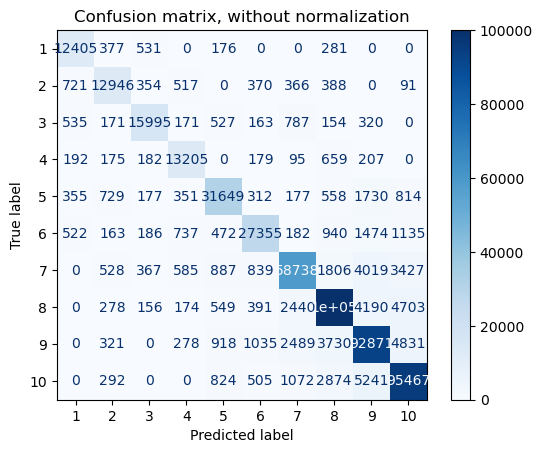

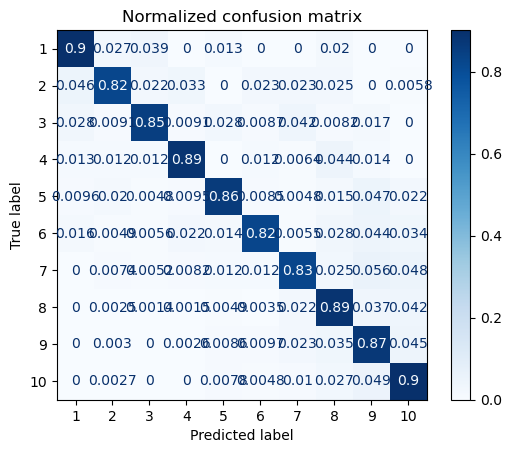

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    7.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    9.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   10.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   11.6s finished


0.8731764968368091

In [25]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.733595
0,isbn13,0.057896
1,normalized_year_of_publication,0.057087
65,state_other,0.011960
45,state_california,0.007220
...,...,...
3,publisher_silhouette,0.000000
2,publisher_harlequin,0.000000
5,publisher_ballantine_books,0.000000
42,country_argentina,0.000000


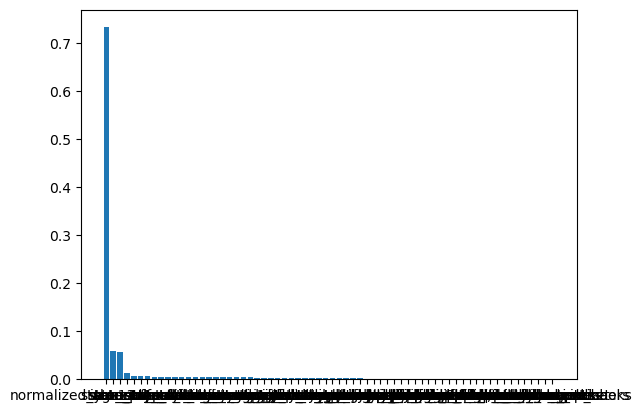

In [26]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [27]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.006384
44,country_other,0.005993
25,country_canada,0.004580
27,country_germany,0.003181
29,country_australia,0.003163
26,country_united_kingdom,0.003030
32,country_portugal,0.002921
34,country_netherlands,0.002713
28,country_spain,0.002457
33,country_new_zealand,0.002421


In [28]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.011960
45,state_california,0.007220
52,state_pennsylvania,0.005435
60,state_massachusetts,0.005324
51,state_florida,0.005223
57,state_michigan,0.005217
53,state_illinois,0.005157
56,state_ohio,0.005063
63,state_north_carolina,0.004925
50,state_new_york,0.004738


In [29]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.002596
11,publisher_warner_books,0.001647
9,publisher_penguin_books,0.001433
15,publisher_signet_book,0.000000
7,publisher_scholastic,0.000000
8,publisher_simon_&amp;_schuster,0.000000
10,publisher_berkley_publishing_group,0.000000
12,publisher_penguin_usa,0.000000
6,publisher_bantam_books,0.000000
13,publisher_harpercollins,0.000000


In [30]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.733595
Name: Importances, dtype: float64
country_importance: 0.047935785485456156
state_importance: 0.09781075027656086
publisher_importance: 0.005676256621541911
